In [1]:
import numpy as np
import pandas as pd
from numpy import linalg as LA
import math

# Plots

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Polygon
plt.style.use('seaborn-white')
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Numerical Solution of Ordinary Differential Equations:

* [Single-step methods](#Single-step-methods)
    * [The (Forward) Euler method](#The-(Forward)-Euler-method)
    * [The Backward (Implicit) Euler method](#The-Backward-(Implicit)-Euler-method)
    * [The improved Euler method](#The-improved-Euler-method)
    * [The Explicit Midpoint method](#The-Explicit-Midpoint-method)
    * [The Implicit Midpoint method](#The-Implicit-Midpoint-method)
    * [Trapezoidal rule](#Trapezoidal-rule)
    * [Heun's method](#Heun's-method)
* [Second-order methods](#Second-order-methods)
    * [Verlet integration](#Verlet-integration)
* [Second-order methods](#Second-order-methods)
* [Multi-step Methods](#Multi-step-Methods)
    * [Runge-Kutta Methods](#The-Runge–Kutta-method)
    * [Adams methods](#Adams-methods)
* [Taylor’s methods](#Taylor’s-methods)

In [2]:
def Figs(x, y, Yexact):
    plt.figure(figsize = (10, 4))
    plt.plot(x, y, 'r')
    plt.plot(x, Yexact, 'b')
    plt.xlim(x[0], x[-1])
    plt.ylim(int(np.min(Yexact))-1, int(np.max(Yexact))+1)
    plt.legend(["Approximation","Exact"], loc=2)
    plt.xlabel('x', fontsize=20)
    plt.ylabel('y', fontsize=20)
    plt.tight_layout()
    plt.show()

## Single-step methods


###  The (Forward) Euler method

Given the initial value problem
$$y'(t)=f(x,y(x)),\qquad y(x_{0})=y_{0},$$
the (forward) Euler method is defiend as follows
$$y_{n+1}=y_{n}+hf(x_{n},y_{n}).$$

In [3]:
def forward_Euler(f, y_init, x_range, h):
    # Inputs
    # f: the ODE y'=f(t,y(x))
    # y0: the initial value
    # x_range: interval [a,b]
    # h: step size h
    
    N = int((x_range[-1] - x_range[0])/h)
    x=np.linspace(x_range[0],x_range[-1],N+1)
    y=np.zeros(N+1, dtype=float)
    y[0]=y_init
    for i in range(N):
        y[i+1]=y[i]+h*f(x[i],y[i])
    
    return x, y

**Example** Conisder the initial value problem $\begin{cases}y'+2xy=xe^{-x^2},\\ y(0) = 1 \end{cases},\quad 0 \leq x \leq 1$ with exact solution $y\left(x \right) = \left(1 + \dfrac{x^{2}}{2}\right) e^{- x^{2}}$, use the forward Euler to approximate the solution of the IVP.

In [4]:
# f(x,y(x)):
f=lambda x, y: x*np.exp(-x**(2))-2*x*y
# f'(x,y(x)):
f1=lambda x, y: np.exp(-x**2) - 2*y - 2*(x**2)*np.exp(-x**2)
# the eact solution y(x)
y_exact= lambda x: (1+(x**2)/2)*np.exp(-x**2)
# the initial value y(0)=1
y_init=1
# the domain 
x_range=[0,1]
# the step size
h=0.01

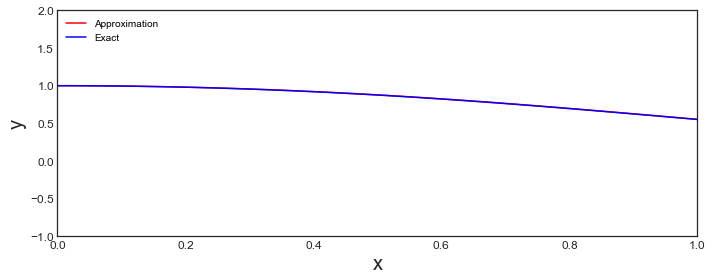

In [5]:
x,y =forward_Euler(f, y_init, x_range, h)
Yexact=y_exact(x)
# Figure
Figs(x, y, Yexact)

In [6]:
it=4
Norm=np.zeros(it, dtype=float)
h=np.zeros(it, dtype=float)
Ratio=np.zeros(it, dtype=float)
LOG=np.zeros(it, dtype=float)

for i in range(it):
    h[i]=0.1/(10**i)
for i in range(it):
    x,y =forward_Euler(f, y_init, x_range, h[i])
    Yexact=y_exact(x)
    Norm[i]=LA.norm(y-Yexact, np.inf)
    if (i>0):
        Ratio[i]=Norm[i-1]/Norm[i]
        LOG[i]=math.log(Ratio[i],10)
        

data = pd.DataFrame({'h': h, 'Norm': Norm, 'Ratio': Ratio, 'Log': LOG})
data

,h,Norm,Ratio,Log
0,0.1000,0.024427,0.000000,0.000000
1,0.0100,0.002304,10.603728,1.025459
2,0.0010,0.000229,10.057657,1.002497
3,0.0001,0.000023,10.005755,1.000250


### The Backward (Implicit) Euler method
Given the initial value problem
$$y'(t)=f(x,y(x)),\qquad y(x_{0})=y_{0},$$
the backward (implicit) Euler method is defiend as follows
$$y_{n+1}=y_{n}+hf(x_{n+1},y_{n+1}).$$

### The improved Euler method

Given the initial value problem
$$y'(t)=f(x,y(x)),\qquad y(x_{0})=y_{0},$$
the (Forward) Euler method is defiend as follows
$$y_{n+1}=y_{n}+hf(x_{n},y_{n}).$$

The improved (semi-implicit) Euler method can be also is defiend as follows
\begin{align}
\begin{cases}
z_{n}=y_{n}+hf(x_{n},y_{n})\\
y_{n+1}=y_{n}+\dfrac{h}{2}\left(f(x_{n},y_{n})+f(x_{n+1},z_{n}) \right)
\end{cases}
\end{align} 

In [7]:
def Improved_forward_Euler(f, y_init, x_range, h):
    # Inputs
    # f: the ODE y'=f(t,y(x))
    # y0: the initial value
    # x_range: interval [a,b]
    # h: step size h
    
    N = int((x_range[-1] - x_range[0])/h)
    x=np.linspace(x_range[0],x_range[-1],N+1)
    y=np.zeros(N+1, dtype=float)
    y[0]=y_init
    for i in range(N):
        z=y[i]+h*f(x[i],y[i])
        y[i+1]=y[i]+(h/2)*(f(x[i],y[i])+f(x[i+1],z))
    
    return x, y

**Example**: Try the previous Example, using the semi-implicit Euler method.

In [8]:
f=lambda x, y: (2*y/x) + (x**2)*np.exp(x)
y_exact= lambda x: (x**2)*(np.exp(x)-np.exp(1))
y_init=0
x_range=[1,2]
h=0.01

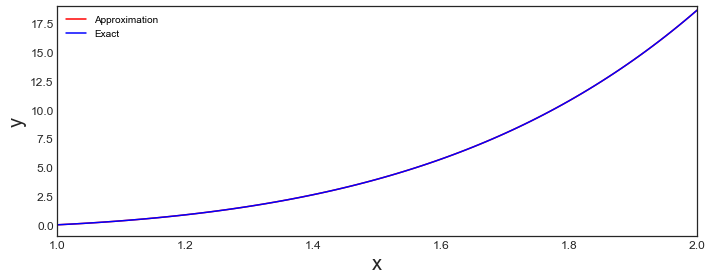

In [9]:
x,y =Improved_forward_Euler(f, y_init, x_range, h)
Yexact=y_exact(x)
# Figure
Figs(x, y, Yexact)

In [10]:
it=4
Norm=np.zeros(it, dtype=float)
h=np.zeros(it, dtype=float)
Ratio=np.zeros(it, dtype=float)
LOG=np.zeros(it, dtype=float)

for i in range(it):
    h[i]=0.1/(10**i)
for i in range(it):
    x,y =Improved_forward_Euler(f, y_init, x_range, h[i])
    Yexact=y_exact(x)
    Norm[i]=LA.norm(y-Yexact, np.inf)
    if (i>0):
        Ratio[i]=Norm[i-1]/Norm[i]
        LOG[i]=math.log(Ratio[i],10)
        

data = pd.DataFrame({'h': h, 'Norm': Norm, 'Ratio': Ratio, 'Log': LOG})
data

,h,Norm,Ratio,Log
0,0.1000,1.042146e-01,0.000000,0.000000
1,0.0100,1.251543e-03,83.268939,1.920483
2,0.0010,1.274492e-05,98.199366,1.992109
3,0.0001,1.276807e-07,99.818628,1.999212


### The Explicit Midpoint method

Given the initial value problem
$$y'(t)=f(x,y(x)),\qquad y(x_{0})=y_{0},$$
The explicit midpoint method is given by the formula
$$y_{n+1}=y_{n}+hf\left(x_{n}+{\frac {h}{2}},y_{n}+{\frac {h}{2}}f(x_{n},y_{n})\right).$$

In [11]:
def Midpoint_method(f, y_init, x_range, h):
    # Inputs
    # f: the ODE y'=f(t,y(x))
    # y0: the initial value
    # x_range: interval [a,b]
    # h: step size h
    
    N = int((x_range[-1] - x_range[0])/h)
    x=np.linspace(x_range[0],x_range[-1],N+1)
    y=np.zeros(N+1, dtype=float)
    y[0]=y_init
    for i in range(N):
        z=y[i]+h*f(x[i],y[i])
        y[i+1]=y[i]+h*f(x[i]+h/2,y[i]+(h/2)*f(x[i],y[i]))
    
    return x, y

In [12]:
f=lambda x, y: (2*y/x) + (x**2)*np.exp(x)
y_exact= lambda x: (x**2)*(np.exp(x)-np.exp(1))
y_init=0
x_range=[1,2]
h=0.01

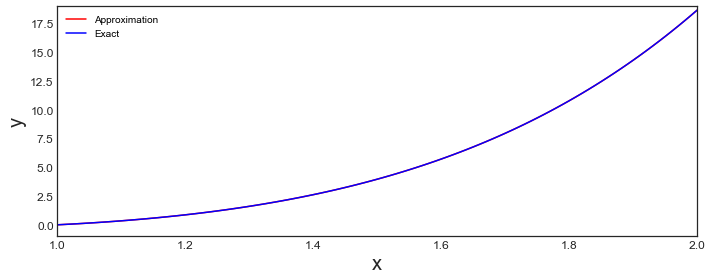

In [13]:
x,y =Midpoint_method(f, y_init, x_range, h)
Yexact=y_exact(x)
# Figure
Figs(x, y, Yexact)

In [14]:
it=4
Norm=np.zeros(it, dtype=float)
h=np.zeros(it, dtype=float)
Ratio=np.zeros(it, dtype=float)
LOG=np.zeros(it, dtype=float)

for i in range(it):
    h[i]=0.1/(10**i)
for i in range(it):
    x,y =Midpoint_method(f, y_init, x_range, h[i])
    Yexact=y_exact(x)
    Norm[i]=LA.norm(y-Yexact, np.inf)
    if (i>0):
        Ratio[i]=Norm[i-1]/Norm[i]
        LOG[i]=math.log(Ratio[i],10)
        

data = pd.DataFrame({'h': h, 'Norm': Norm, 'Ratio': Ratio, 'Log': LOG})
data

,h,Norm,Ratio,Log
0,0.1000,1.627825e-01,0.000000,0.000000
1,0.0100,1.801962e-03,90.336259,1.955862
2,0.0010,1.820544e-05,98.979312,1.995544
3,0.0001,1.822414e-07,99.897395,1.999554


### The Implicit Midpoint method

Given the initial value problem
$$y'(t)=f(x,y(x)),\qquad y(x_{0})=y_{0},$$
the implicit midpoint method is given by
$$y_{n+1}=y_{n}+hf\left(t_{n}+{\frac {h}{2}},{\frac {1}{2}}(y_{n}+y_{n+1})\right).$$

### Trapezoidal rule

Given the initial value problem
$$y'(t)=f(x,y(x)),\qquad y(x_{0})=y_{0},$$
the trapezoidal rule is given by
$$y_{{n+1}}=y_{n}+{\dfrac  12}h{\Big (}f(x_{n},y_{n})+f(x_{{n+1}},y_{{n+1}}){\Big )}.$$

### Heun's method

Given the initial value problem
$$y'(t)=f(x,y(x)),\qquad y(x_{0})=y_{0},$$
the Heun's method is given by
$$
y_{n+1}=y_{n}+{\dfrac {h}{4}}\left(f(x_{n},y_{n})+f(x_{n}+\dfrac{2}{3}h,y_{n}+\dfrac{2}{3}f(x_n,y_n))\right). 
$$

In [15]:
def Heun_method(f, y_init, x_range, h):
    # Inputs
    # f: the ODE y'=f(t,y(x))
    # y0: the initial value
    # x_range: interval [a,b]
    # h: step size h
    
    N = int((x_range[-1] - x_range[0])/h)
    x=np.linspace(x_range[0],x_range[-1],N+1)
    y=np.zeros(N+1, dtype=float)
    y[0]=y_init
    for i in range(N):
        y[i+1]=y[i]+(h/4)*(f(x[i],y[i])+3*f(x[i]+(2*h/3),y[i]+(2*h/3)*f(x[i],y[i])))
    
    return x, y

In [16]:
f=lambda x, y: (2*y/x) + (x**2)*np.exp(x)
y_exact= lambda x: (x**2)*(np.exp(x)-np.exp(1))
y_init=0
x_range=[1,2]
h=0.01

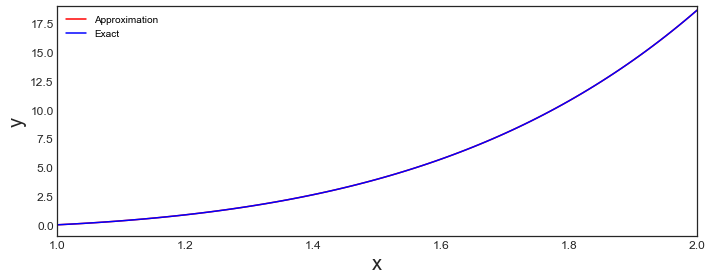

In [17]:
x,y =Heun_method(f, y_init, x_range, h)
Yexact=y_exact(x)
# Figure
Figs(x, y, Yexact)

In [18]:
it=4
Norm=np.zeros(it, dtype=float)
h=np.zeros(it, dtype=float)
Ratio=np.zeros(it, dtype=float)
LOG=np.zeros(it, dtype=float)

for i in range(it):
    h[i]=0.1/(10**i)
for i in range(it):
    x,y =Heun_method(f, y_init, x_range, h[i])
    Yexact=y_exact(x)
    Norm[i]=LA.norm(y-Yexact, np.inf)
    if (i>0):
        Ratio[i]=Norm[i-1]/Norm[i]
        LOG[i]=math.log(Ratio[i],10)
        

data = pd.DataFrame({'h': h, 'Norm': Norm, 'Ratio': Ratio, 'Log': LOG})
data

,h,Norm,Ratio,Log
0,0.1000,1.441763e-01,0.000000,0.000000
1,0.0100,1.619526e-03,89.023734,1.949506
2,0.0010,1.638632e-05,98.834062,1.994907
3,0.0001,1.640556e-07,99.882698,1.999490


## Multi-step Methods

### The Runge–Kutta method

It is defiend as follows

$y_{n+1}=y_{n}+{\dfrac {1}{6}}\left(k_{1}+2k_{2}+2k_{3}+k_{4}\right),\quad \text{for }n = 0, 1, 2, 3, \ldots,$
with
\begin{align}
\begin{cases}
k_{1}&=h\ f(t_{n},y_{n}),\\k_{2}&=h\ f\left(t_{n}+{\frac {h}{2}},y_{n}+{\frac {k_{1}}{2}}\right),\\k_{3}&=h\ f\left(t_{n}+{\frac {h}{2}},y_{n}+{\frac {k_{2}}{2}}\right),\\k_{4}&=h\ f\left(t_{n}+h,y_{n}+k_{3}\right).
\end{cases}
\end{align} 

In [19]:
def runge_kutta(f, y_init, x_range, h):
    # Inputs
    # f: the ODE y'=f(t,y(x))
    # y0: the initial value
    # x_range: interval [a,b]
    # h: step size h
    
    N = int((x_range[-1] - x_range[0])/h)
    x=np.linspace(x_range[0],x_range[-1],N+1)
    y=np.zeros(N+1, dtype=float)
    y[0]=y_init
    for i in range(N):
        k1=f(x[i],y[i]);
        k2=f(x[i]+(h/2),y[i]+(h/2)*k1);
        k3=f(x[i]+(h/2),y[i]+(h/2)*k2);
        k4=f(x[i+1],y[i]+h*k3);
        y[i+1]=y[i]+h*(k1+2*k2+2*k3+k4)/6
    
    return x, y

In [20]:
f=lambda x, y: (2*y/x) + (x**2)*np.exp(x)
y_exact= lambda x: (x**2)*(np.exp(x)-np.exp(1))
y_init=0
x_range=[1,2]
h=0.01

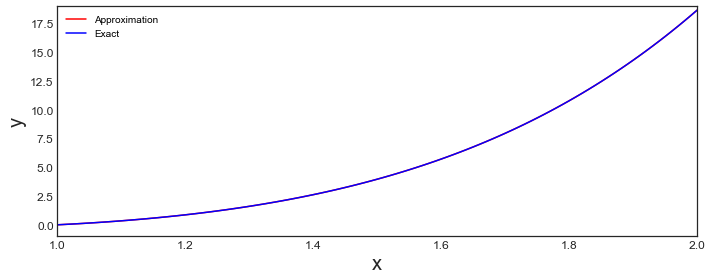

In [21]:
x,y =runge_kutta(f, y_init, x_range, h)
Yexact=y_exact(x)
# Figure
Figs(x, y, Yexact)

In [22]:
it=3
Norm=np.zeros(it, dtype=float)
h=np.zeros(it, dtype=float)
Ratio=np.zeros(it, dtype=float)
LOG=np.zeros(it, dtype=float)

for i in range(it):
    h[i]=0.1/(10**i)
for i in range(it):
    x,y =runge_kutta(f, y_init, x_range, h[i])
    Yexact=y_exact(x)
    Norm[i]=LA.norm(y-Yexact, np.inf)
    if (i>0):
        Ratio[i]=Norm[i-1]/Norm[i]
        LOG[i]=math.log(Ratio[i],10)
        

data = pd.DataFrame({'h': h, 'Norm': Norm, 'Ratio': Ratio, 'Log': LOG})
data

,h,Norm,Ratio,Log
0,0.100,1.705142e-04,0.000000,0.000000
1,0.010,2.034729e-08,8380.192342,3.923254
2,0.001,2.071232e-12,9823.763293,3.992278


### Adams methods


* The two-step Adams predictor-corrector method:

\begin{align}
z_{n+1}&=y_{n}+\dfrac{h}{2}\left(3f(x_{n},y_{n})-f(x_{n-1},y_{n-1})\right),\\
y_{n+1}&=y_{n}+\dfrac{h}{2} \left(f(x_{n+1},z_{n+1})+f(x_{n},y_{n})\right).
\end{align}

The four-step Adams predictor-corrector method uses the four-step Adams–Bashforth and Adams-Moulton methods together:

\begin{align}
z_{n+1}&=y_{n}+\dfrac{h}{24} \left(55f(x_{n},y_{n})-59f(x_{n-1},y_{n-1})+37f(x_{n-2},y_{n-2})-9f(x_{n-3},y_{n-3})\right),\\
y_{n+1}&=y_{n}+\dfrac{h}{24} \left(9f(x_{n+1},z_{n+1})+19f(x_{n},y_{n})-5f(x_{n-1},y_{n-1})+f(x_{n-2},y_{n-2})\right).
\end{align} 

In [23]:
def Adams_2step(f, y_init, x_range, h):
    # Inputs
    # f: the ODE y'=f(t,y(x))
    # y0: the initial value
    # x_range: interval [a,b]
    # h: step size h
    
    N = int((x_range[-1] - x_range[0])/h)
    x=np.linspace(x_range[0],x_range[-1],N+1)
    y=np.zeros(N+1, dtype=float)
    # the first two steps in Runge-Kutta
    x, y=runge_kutta(f, y_init, x_range, h)
        
    for i in range(1,N):
        z=y[i]+(h/2)*(3*f(x[i],y[i])-f(x[i-1],y[i-1]))
        y[i+1]=y[i]+(h/2)*(f(x[i+1],z)+f(x[i],y[i]))
    
    return x, y

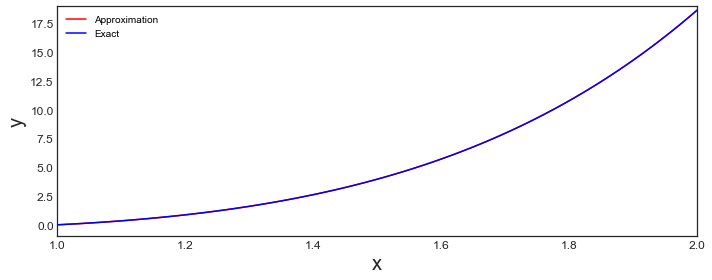

In [24]:
f=lambda x, y: (2*y/x) + (x**2)*np.exp(x)
y_exact= lambda x: (x**2)*(np.exp(x)-np.exp(1))
y_init=0
x_range=[1,2]
h=0.01
x,y =Adams_2step(f, y_init, x_range, h)
Yexact=y_exact(x)
# Figure
Figs(x, y, Yexact)

In [25]:
it=3
Norm=np.zeros(it, dtype=float)
h=np.zeros(it, dtype=float)
Ratio=np.zeros(it, dtype=float)
LOG=np.zeros(it, dtype=float)

for i in range(it):
    h[i]=0.1/(10**i)
for i in range(it):
    x,y =Adams_2step(f, y_init, x_range, h[i])
    Yexact=y_exact(x)
    Norm[i]=LA.norm(y-Yexact, np.inf)
    if (i>0):
        Ratio[i]=Norm[i-1]/Norm[i]
        LOG[i]=math.log(Ratio[i],10)
        

data = pd.DataFrame({'h': h, 'Norm': Norm, 'Ratio': Ratio, 'Log': LOG})
data

,h,Norm,Ratio,Log
0,0.100,0.071255,0.000000,0.000000
1,0.010,0.001125,63.332893,1.801629
2,0.001,0.000012,95.504329,1.980023


In [26]:
def Adams_4step(f, y_init, x_range, h):
    # Inputs
    # f: the ODE y'=f(t,y(x))
    # y0: the initial value
    # x_range: interval [a,b]
    # h: step size h
    
    N = int((x_range[-1] - x_range[0])/h)
    x=np.linspace(x_range[0],x_range[-1],N+1)
    y=np.zeros(N+1, dtype=float)
    # the first two steps in Runge-Kutta
    x, y=runge_kutta(f, y_init, x_range, h)
        
    for i in range(3,N):
        z=y[i]+(h/24)*(55*f(x[i],y[i])-59*f(x[i-1],y[i-1])+37*f(x[i-2],y[i-2])-9*f(x[i-3],y[i-3]))
        y[i+1]=y[i]+(h/24)*(9*f(x[i+1],z)+19*f(x[i],y[i])-5*f(x[i-1],y[i-1])+f(x[i-2],y[i-2]))
    return x, y

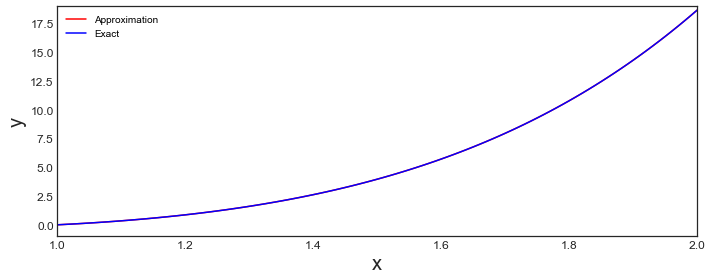

In [27]:
f=lambda x, y: (2*y/x) + (x**2)*np.exp(x)
y_exact= lambda x: (x**2)*(np.exp(x)-np.exp(1))
y_init=0
x_range=[1,2]
h=0.01
x,y =Adams_4step(f, y_init, x_range, h)
Yexact=y_exact(x)
# Figure
Figs(x, y, Yexact)

In [28]:
it=3
Norm=np.zeros(it, dtype=float)
h=np.zeros(it, dtype=float)
Ratio=np.zeros(it, dtype=float)
LOG=np.zeros(it, dtype=float)

for i in range(it):
    h[i]=0.1/(10**i)
for i in range(it):
    x,y =Adams_4step(f, y_init, x_range, h[i])
    Yexact=y_exact(x)
    Norm[i]=LA.norm(y-Yexact, np.inf)
    if (i>0):
        Ratio[i]=Norm[i-1]/Norm[i]
        LOG[i]=math.log(Ratio[i],10)
        

data = pd.DataFrame({'h': h, 'Norm': Norm, 'Ratio': Ratio, 'Log': LOG})
data

,h,Norm,Ratio,Log
0,0.100,1.463079e-04,0.000000,0.000000
1,0.010,7.086653e-08,2064.555713,3.314827
2,0.001,7.993606e-12,8865.402222,3.947698


## Taylor’s methods

Taylor's Method of order $n$:

\begin{align*}
y(x_{i+1}) = y(x_{i})& + h f(x_{i},y(x_{i})) + \frac{h^{2}}{2} f'(x_{i},y(x_{i})) + \ldots + \frac{h^{n}}{n!}f^{(n-1)}(x_{i},y(x_{i}))
\end{align*} 

In [29]:
def Taylor_Method(f,f1, y_init, x_range, h):
    # Inputs
    # f: the ODE y'=f(t,y(x))
    # f1: the derivative of f(t,y(x))
    # y0: the initial value
    # x_range: interval [a,b]
    # h: step size h
    
    N = int((x_range[-1] - x_range[0])/h)
    x=np.linspace(x_range[0],x_range[-1],N+1)
    y=np.zeros(N+1, dtype=float)
        
    for i in range(0,N):
        y[i+1]=y[i]+h*f(x[i],y[i])+((h**2)/2)*f1(x[i],y[i])
    return x, y

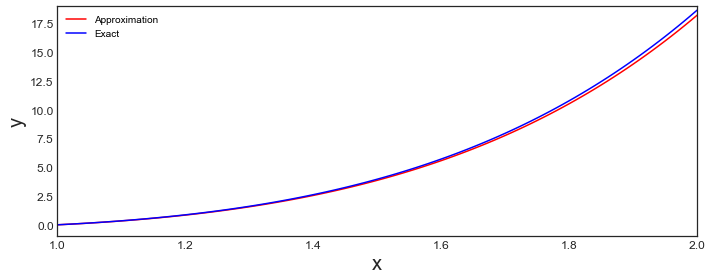

In [30]:
f=lambda x, y: (2*y/x) + (x**2)*np.exp(x)
y_exact= lambda x: (x**2)*(np.exp(x)-np.exp(1))
y_init=0
x_range=[1,2]
h=0.01
x,y =Taylor_Method(f, f1, y_init, x_range, h)
Yexact=y_exact(x)
# Figure
Figs(x, y, Yexact)

In [31]:
it=4
Norm=np.zeros(it, dtype=float)
h=np.zeros(it, dtype=float)
Ratio=np.zeros(it, dtype=float)
LOG=np.zeros(it, dtype=float)

for i in range(it):
    h[i]=0.1/(10**i)
for i in range(it):
    x,y =Taylor_Method(f, f1, y_init, x_range, h[i])
    Yexact=y_exact(x)
    Norm[i]=LA.norm(y-Yexact, np.inf)
    if (i>0):
        Ratio[i]=Norm[i-1]/Norm[i]
        LOG[i]=math.log(Ratio[i],10)
        

data = pd.DataFrame({'h': h, 'Norm': Norm, 'Ratio': Ratio, 'Log': LOG})
data

,h,Norm,Ratio,Log
0,0.1000,3.798546,0.000000,0.000000
1,0.0100,0.440811,8.617166,0.935364
2,0.0010,0.044802,9.839023,0.992952
3,0.0001,0.004488,9.983634,0.999289
